# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 3**

**Número do Grupo:**

**Alunos:**
1. Danilo Carneiro
2. Roger Rafael

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Manuseio e exploração de datasets utilizando a biblioteca `pandas`;
- Análise de variância e sua interpretação para a limpeza de datasets;
- Utilização de métodos de imputação de valores faltantes com a biblioteca `scikit-learn`;
- Transformação de variáveis utilizando a biblioteca `scikit-learn`;

---

Para os exercícios de **1** a **5**, utilizaremos o dataset **titanic.csv**. A célula de código a seguir realizará o download deste dataset para o ambiente virtual do Google Colab.


In [44]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-09-21 18:05:54--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 173.194.213.101, 173.194.213.139, 173.194.213.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.213.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k600usbe7mp5q7vug7nlm5ig1alhi4ur/1695319500000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=6b8e1f0e-db91-4736-a0b5-1a9d5dbfe88a [following]
--2023-09-21 18:05:54--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/k600usbe7mp5q7vug7nlm5ig1alhi4ur/1695319500000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=6b8e1f0e-db91-4736-a0b5-1a9d5dbfe88a
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 172.217.204.132, 

## Dataset **titanic.csv**

---
### Questão 01.

Carregue o dataset **titanic.csv** (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values='?'`.

In [45]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
dtset = pd.read_csv('titanic.csv')
vari = pd.read_csv('titanic.csv', na_values='?')
vari.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### Questão 02.
Realize uma análise exploratória inicial do dataset fornecido.

Para isso, você deve:

 - Apresente a quantidade de valores faltantes para cada variável do dataset.
 - Identifique o tipo de dado de cada uma das variáveis (se são numéricas ou categóricas). Pode-se induzir o tipo real das variáveis utilizando o nome delas e seus valores, ou acessar um [dicionário do dataset online](https://www.codingninjas.com/studio/library/intro-to-titanic-dataset-and-data-analysis).
 - Corrija os tipos das variáveis no dataframe pandas criado.

  **ATENÇÃO: O pandas pode importar as variáveis com os tipos incorretos!**

In [47]:
faltantes = pd.DataFrame.isna(dtset).sum()
print(faltantes)
print('')
print(dtset.dtypes)
dtset['Pclass'] = dtset['Pclass'].astype(object)
dtset['Survived'] = dtset['Survived'].astype(object)

print('')
print('Corrigido:')
print(dtset.dtypes)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Corrigido:
PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object




---

### Questão 03.

Realize o pré-processamento do dataset fornecido.

Para isso, você deve:


-   **Para as variáveis numéricas:** substitua os valores faltantes utilizando a estratégia de **mediana** (`sklearn.impute.SimpleImputer`). Depois, **normalize** as variáveis (`sklearn.preprocessing.MinMaxScaler`).
-   **Para as variáveis categóricas:** substitua os valores faltantes utilizando a estratégia de **mais frequentes** (`sklearn.impute.SimpleImputer`). Depois, converta os dados categóricos para uma representação numérica, utilizando a codificação **Label Encoding** (`sklearn.preprocessing.LabelEncoder`).

Por fim, apresente os resultados, comprovando que a imputação e transformações foram feitas corretamente.

In [48]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

col_num = dtset.select_dtypes(include=['number']).columns

imputer.fit_transform(dtset[col_num])

dtset[col_num] = imputer.transform(dtset[col_num])

from sklearn.preprocessing import MinMaxScaler
#Normalização
scaler = MinMaxScaler()

scaler.fit(dtset[col_num])

dtset[col_num] = scaler.transform(dtset[col_num])

#-----/\ númericas. \/ categóricas -----------------------------

imputer2 = SimpleImputer(strategy='most_frequent')

col_char = dtset.select_dtypes(include=['category', 'object']).columns

imputer2.fit(dtset[col_char])

dtset[col_char] = imputer2.transform(dtset[col_char])
#Normalização
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dtset[col_char] = dtset[col_char].apply(encoder.fit_transform)

print(dtset.dtypes)

PassengerId    float64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp          float64
Parch          float64
Ticket           int64
Fare           float64
Cabin            int64
Embarked         int64
dtype: object




---

### Questão 04.

Neste conjunto de dados, entre as variáveis tem alguma que tem outliers? Se sim, indique-os.

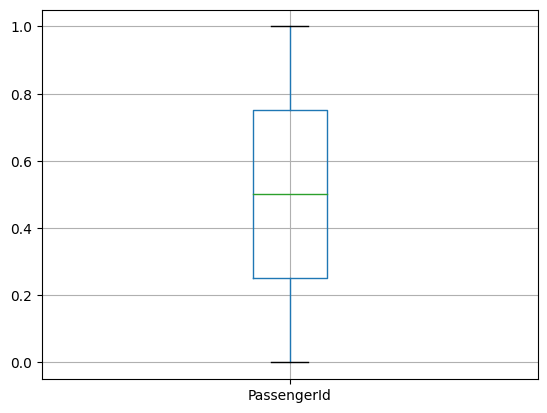

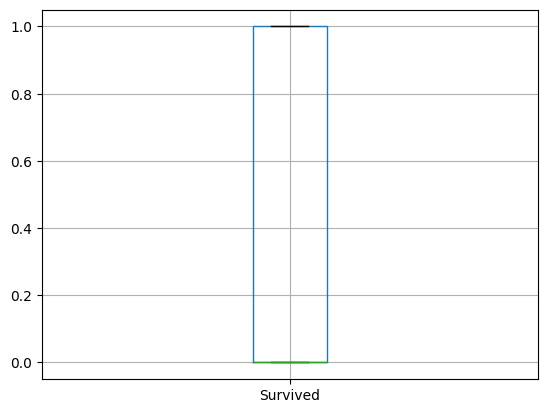

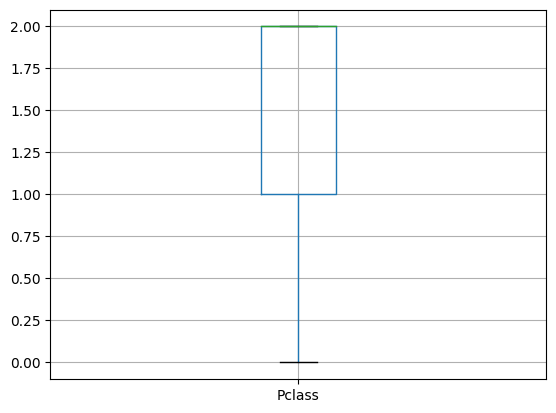

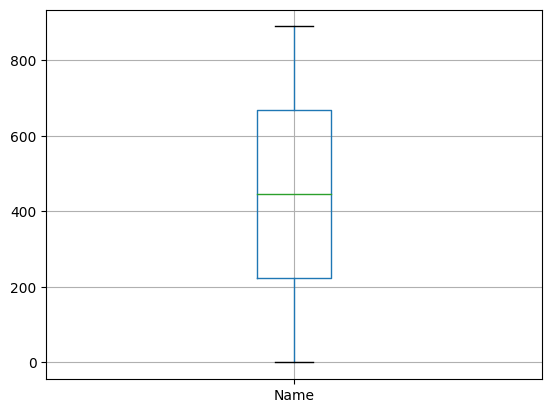

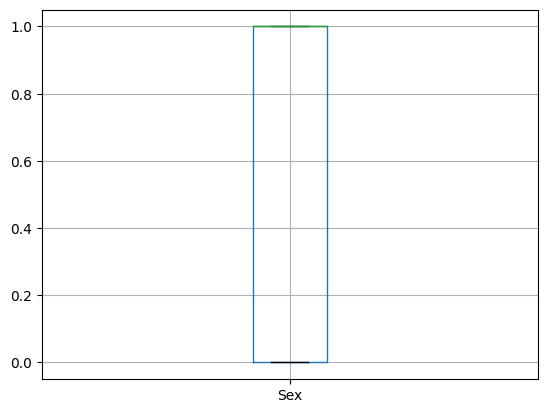

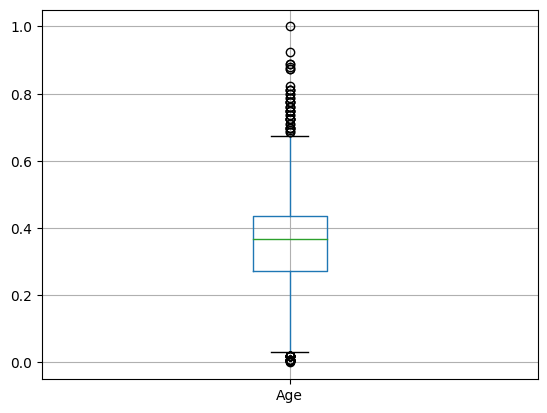

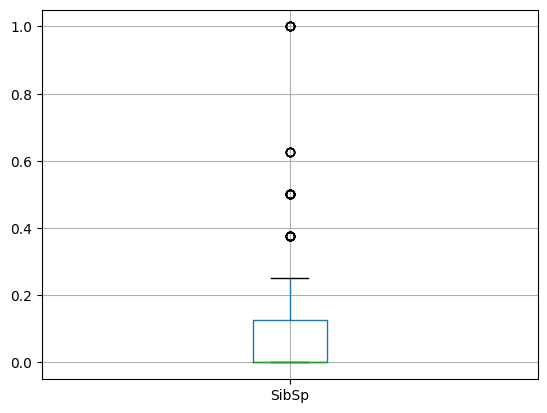

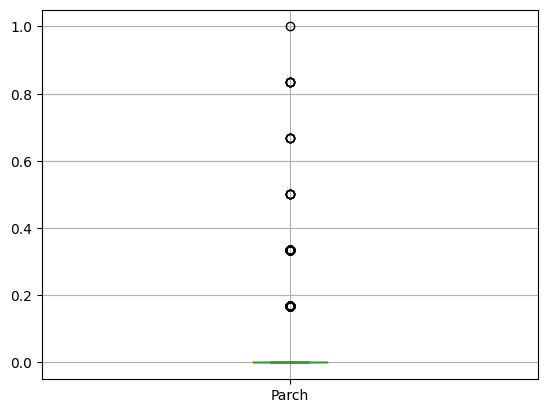

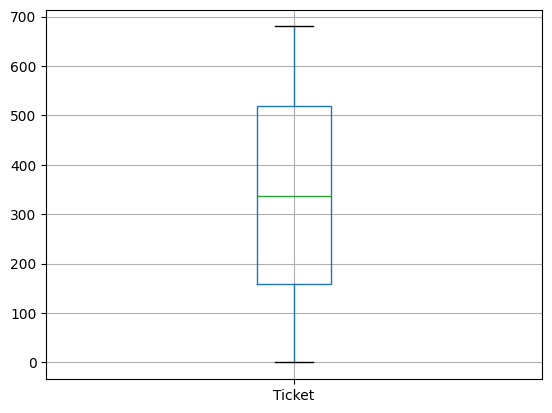

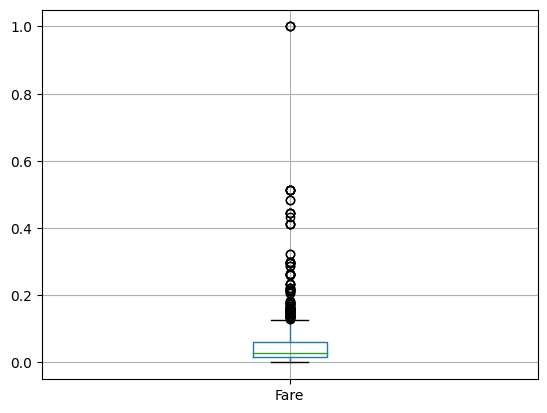

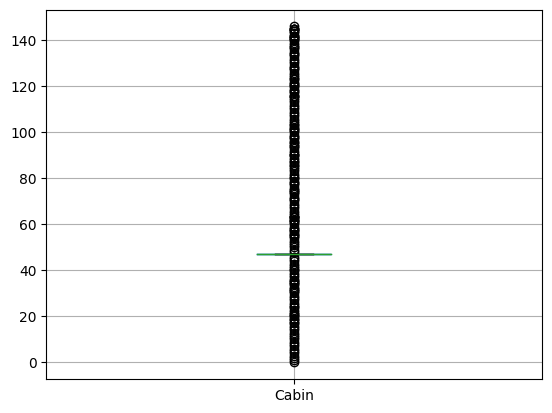

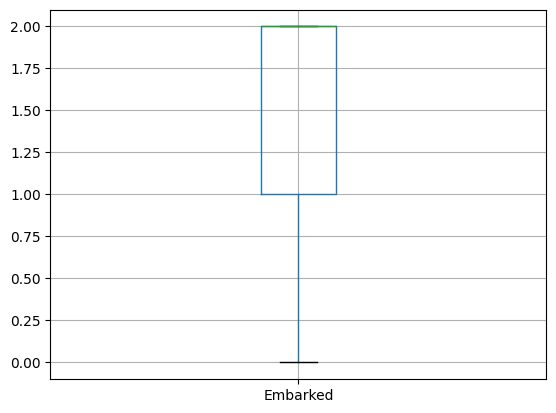

In [59]:
import matplotlib.pyplot as plt

vetor = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',  'Embarked']
for i in range(len(vetor)):
  dtset.boxplot(column=vetor[i])
  plt.show()
#Variáveis com outliers: Age, SibSp, Parch, Fare, Cabin



---

### Questão 05.

Determine as 3 variáveis categóricas com maior variância (`pandas.DataFrame.var`).

Por que seria difícil extrair conhecimento destas 3 variáveis?

> Lembre-se que após realizar a transformação das variáveis categóricas com codificação Label Encoding, essas variáveis tornaram-se do tipo numérico para o pandas. Contudo, **o conhecimento representado por elas ainda é categórico!**

In [62]:
variancias = dtset.var()

top_variancias = variancias.sort_values(ascending=False).head(3)

print(top_variancias)

Name      66231.000000
Ticket    40340.986540
Cabin       555.464442
dtype: float64




---

### Questão 06.

Com as 3 varíaveis identificadas na questão anterior, crie um novo dataset que não contenha essas 3 váriaveis.

Apresente as 5 primeiras linhas do novo dataset criado.

In [63]:
data_novo=dtset.drop(columns=top_variancias.index)
print(data_novo.head())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0     0.000000         0       2    1  0.271174  0.125    0.0  0.014151   
1     0.001124         1       0    0  0.472229  0.125    0.0  0.139136   
2     0.002247         1       2    0  0.321438  0.000    0.0  0.015469   
3     0.003371         1       0    0  0.434531  0.125    0.0  0.103644   
4     0.004494         0       2    1  0.434531  0.000    0.0  0.015713   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  
